In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install jupyterthemes # Install jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.

In [8]:
tweets_df = pd.read_csv('twitter.csv', on_bad_lines='skip')

In [9]:
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [10]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [11]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [12]:
tweets_df['tweet']

,tweet
0,@user when a father is dysfunctional and is s...
1,@user @user thanks for #lyft credit i can't us...
2,bihday your majesty
3,#model i love u take with u all the time in ...
4,factsguide: society now #motivation
...,...
31957,ate @user isz that youuu?ðððððð...
31958,to see nina turner on the airwaves trying to...
31959,listening to sad songs on a monday morning otw...
31960,"@user #sikh #temple vandalised in in #calgary,..."


In [13]:
# Drop the 'id' column
tweets_df = tweets_df.drop(['id'], axis=1)

<Axes: >

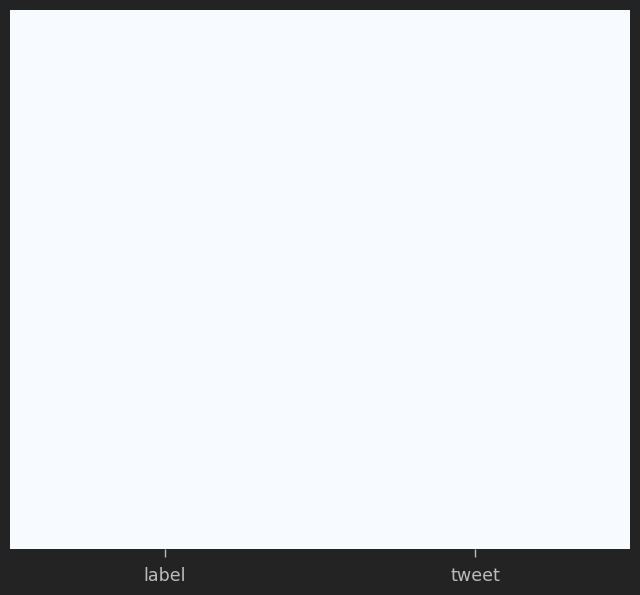

In [14]:
 sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<Axes: title={'center': 'label'}>]], dtype=object)

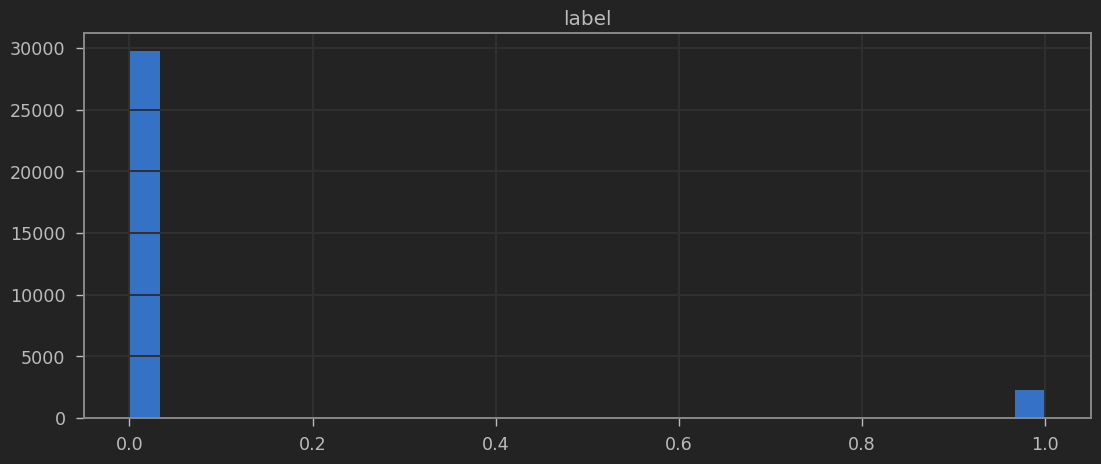

In [15]:
tweets_df.hist(bins=30, figsize = (13, 5))

<Axes: xlabel='label', ylabel='count'>

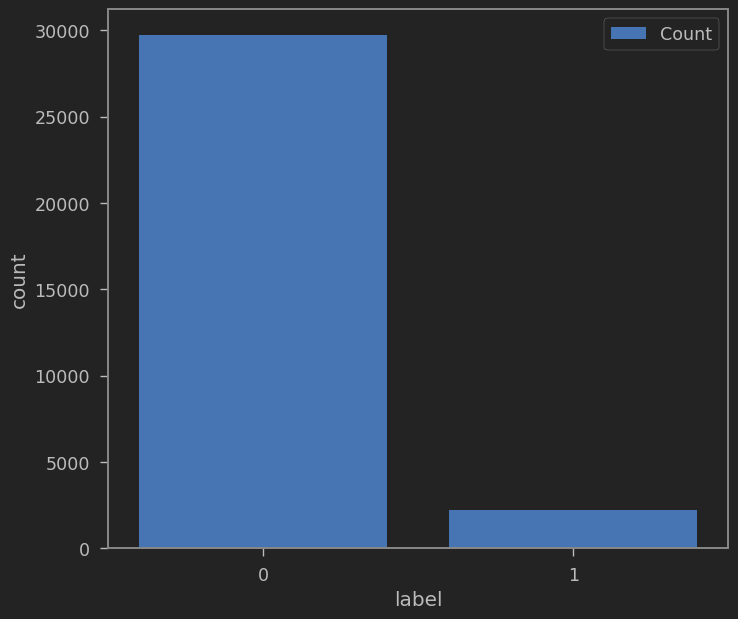

In [16]:
sns.countplot(x=tweets_df["label"], label='Count')

In [17]:
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [18]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [19]:
#Let's view the shortest message
tweets_df[
tweets_df['length'] == 11    ] ['tweet']

,tweet
25195,i love you


<Axes: ylabel='Frequency'>

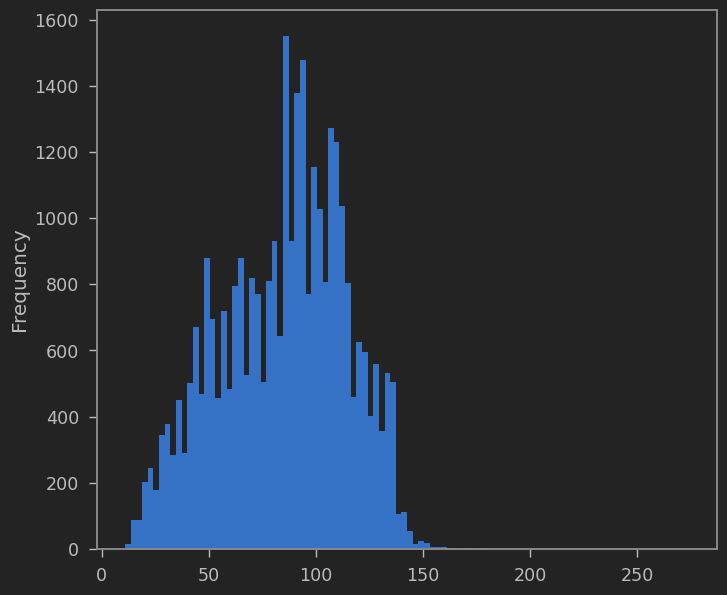

In [20]:
tweets_df [tweets_df[ "length"] == 84    ]['tweet'].iloc[0]

#Plot the histagrum of the Length column
tweets_df['length'].plot(bins=100, kind='hist')

In [21]:
positive = tweets_df[tweets_df['label']==0]
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [22]:
negative = tweets_df[tweets_df['label']==1]
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [23]:
sentences = tweets_df['tweet'].tolist()
len(sentences)

31962

In [24]:
sentences_as_one_string =" ".join(sentences)

In [25]:
sentences_as_one_string

Output hidden; open in https://colab.research.google.com to view.

In [26]:
!pip install wordcloud

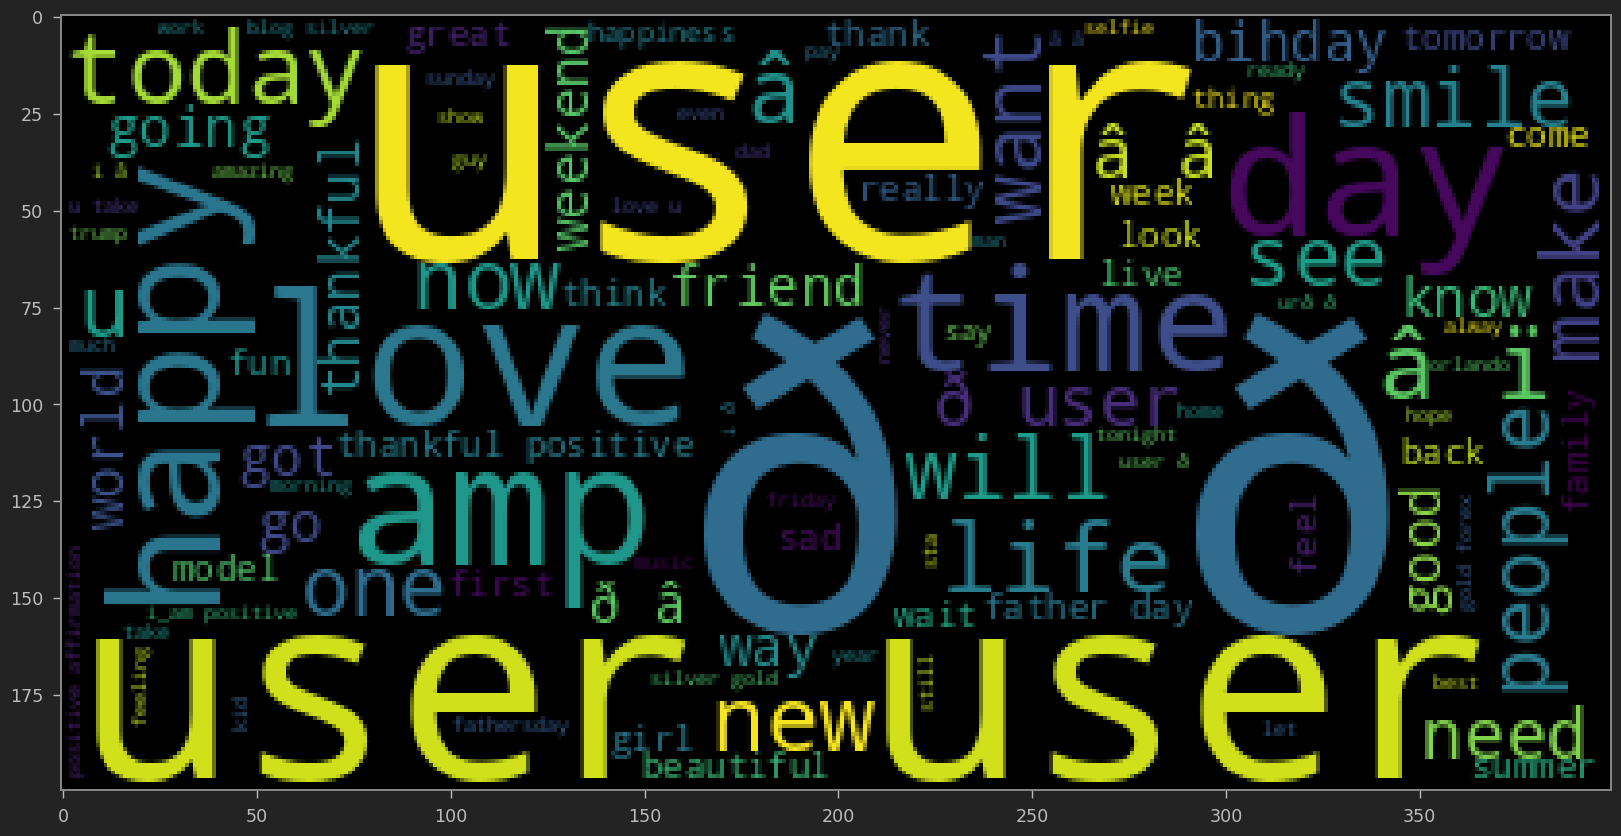

In [27]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

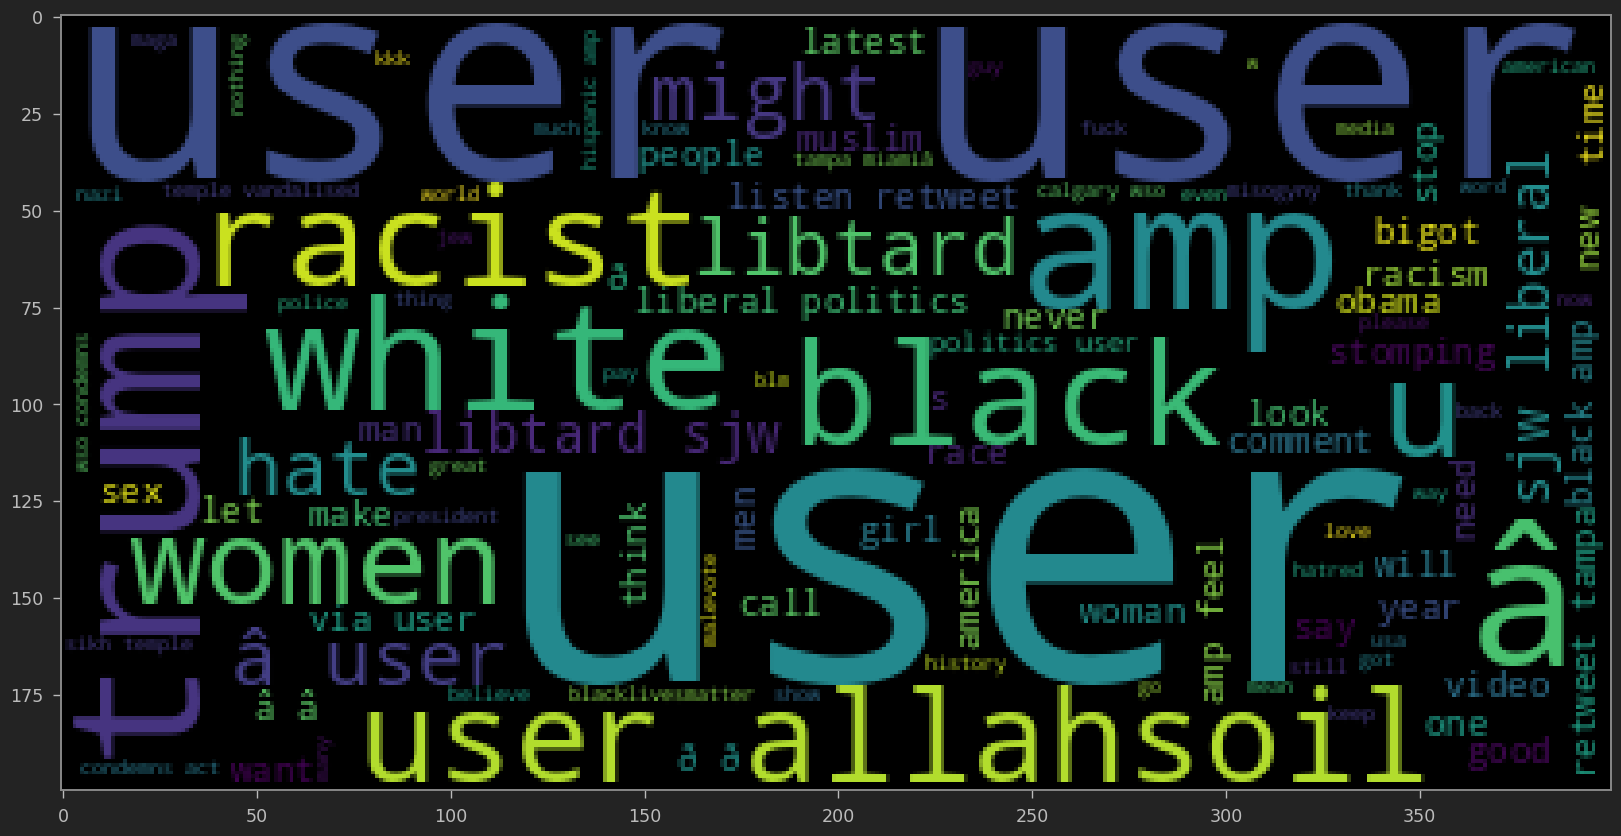

In [28]:
negative_list = negative['tweet'].tolist()
negative_sentence_as_one_string = " ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentence_as_one_string))

In [21]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
Test = '$I love AI & Machine learning!!'

In [31]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [32]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'A',
 'I']

In [33]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

In [22]:
import nltk # Natural Language tool kit
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [35]:
Test_punc_removed_join = 'I enjoy coding, programming and Artificial intelligence'
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [36]:
Test_punc_removed_join_clean # Only important (no so common) words are left

['enjoy', 'coding,', 'programming', 'Artificial', 'intelligence']

In [37]:
Test_punc_removed_join

'I enjoy coding, programming and Artificial intelligence'

In [38]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

In [39]:
mini_challenge_no_punc = ''.join([char for char in mini_challenge if char not in string.punctuation])
mini_challenge_clean = [word for word in mini_challenge_no_punc.split() if word.lower() not in stopwords.words('english')]
mini_challenge_clean

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

In [40]:
# Assuming 'challenge' was a typo and 'mini_challenge' was intended.
# Also, fixing the syntax of the list comprehension.
challenge_clean_fixed = [word for word in mini_challenge.split() if word.lower() not in stopwords.words('english')]
print(challenge_clean_fixed)

['mini', 'challenge,', 'teach', 'remove', 'stopwords', 'punctuations!']


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']


In [42]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'paper' 'second' 'the' 'third' 'this']


In [43]:
print(X.toarray())

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


In [44]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

# mini_challenge = ['Hello World', 'Hello Hello Hello World world', 'Hello Hello World world world World']



In [23]:
# Let's define a pipeline to clean up all the messages
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [48]:
# Let's test the newly added function
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [49]:
print(tweets_df_clean[5]) # show the cleaned up version

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [50]:
print(tweets_df['tweet'][5]) # show the original version

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [51]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [52]:
print(vectorizer.get_feature_names_out())

['0' '0000001' '00027' ... 'ó¾°\x80'
 'ó¾°\x80ó¾\x8d\x92ó¾\x86\x9fó¾\x86¤ó¾®\x9fó¾\x92ºó¾®\x9eó¾\x94\x9bó¾\x94\x83ó¾\x95\x86'
 'ó¾°\x80ó¾°\x80ó¾°\x80']


In [53]:
print(tweets_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [54]:
tweets_countvectorizer.shape

(31962, 47386)

In [56]:
X = pd.DataFrame(tweets_countvectorizer.toarray())

In [57]:
X

,0,1,2,3,4,5,6,7,8,9,...,47376,47377,47378,47379,47380,47381,47382,47383,47384,47385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
y = tweets_df['label']

In [60]:
X.shape

(31962, 47386)

In [61]:
y.shape

(31962,)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
from sklearn.naive_bayes import MultinomialNB


In [64]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

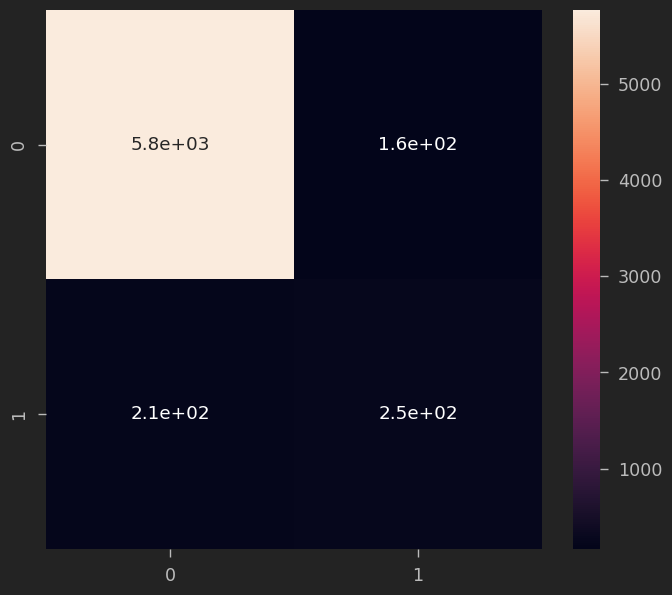

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [66]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5937
           1       0.60      0.54      0.57       456

    accuracy                           0.94      6393
   macro avg       0.78      0.76      0.77      6393
weighted avg       0.94      0.94      0.94      6393



FINAL PROJECT SOLUTION

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.

In [6]:
# Load the data
reviews_df = pd.read_csv('amazon_reviews.csv', on_bad_lines='skip')

In [7]:
# View the DataFrame Information
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [8]:
# View DataFrame Statistical Summary
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


<Axes: xlabel='rating', ylabel='count'>

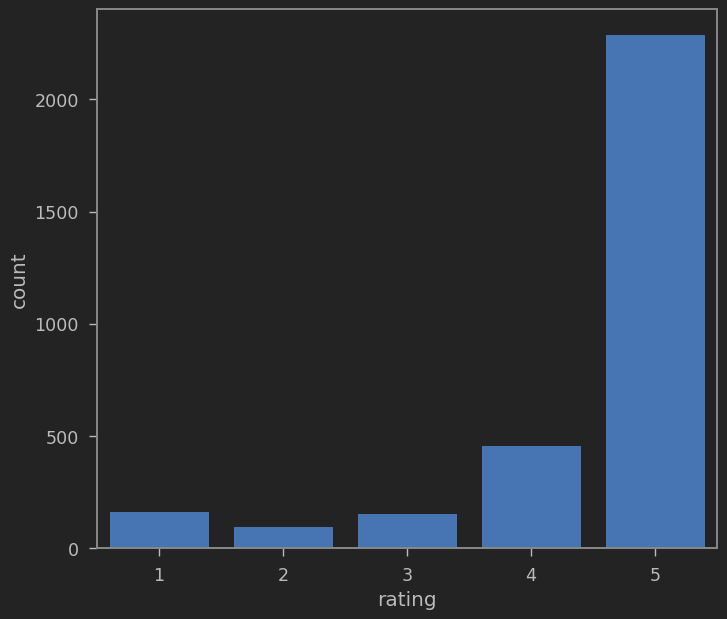

In [9]:
# Plot the count plot for the ratings
sns.countplot(x = reviews_df['rating'])

In [10]:
# Let's get the length of the verified_reviews column, handling potential NaN values
reviews_df['length'] = reviews_df['verified_reviews'].fillna('').apply(len)

In [11]:
reviews_df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


<Axes: ylabel='Frequency'>

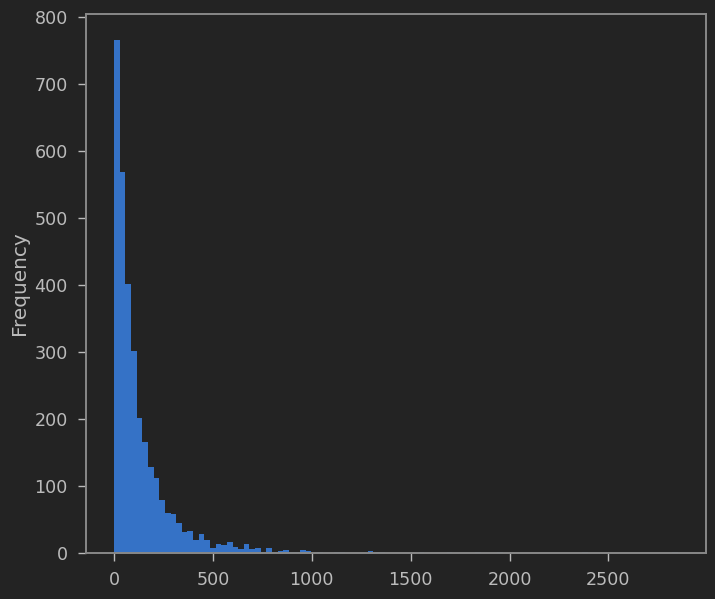

In [12]:
# Plot the histogram for the length
reviews_df['length'].plot(bins=100, kind='hist')

In [13]:
# Apply the describe method to get statistical summary
reviews_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.048254
std,1.068506,0.273778,182.100859
min,1.000000,0.000000,0.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


<Axes: xlabel='feedback', ylabel='count'>

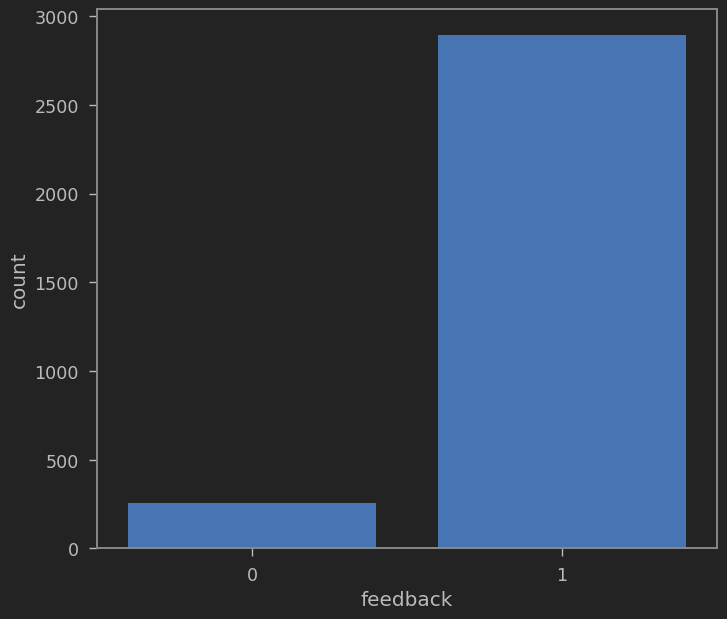

In [14]:
# Plot the countplot for feedback
# Positive ~2800
# Negative ~250
sns.countplot(x = reviews_df['feedback'])

In [15]:
# Obtain only the positive reviews
positive = reviews_df[reviews_df['feedback'] == 1]
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [16]:
# Obtain the negative reviews only
negative = reviews_df[reviews_df['feedback'] == 0]
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


In [17]:
# Convert to list format
sentences = positive['verified_reviews'].fillna('').tolist()
len(sentences)

2893

In [18]:
# Join all reviews into one large string
sentences_as_one_string =" ".join(sentences)

In [19]:
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

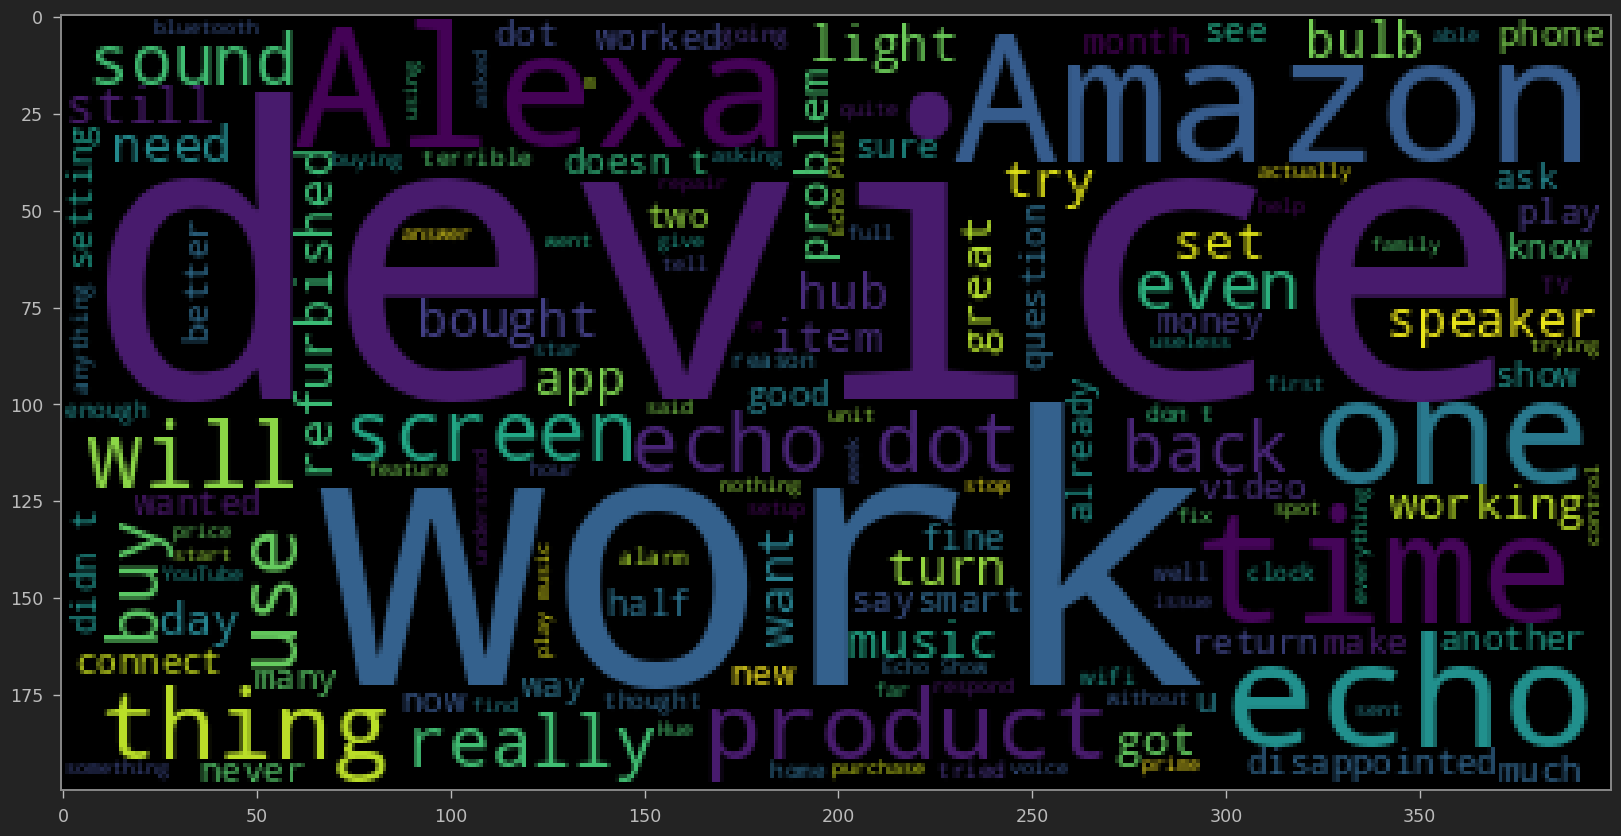

In [20]:
from wordcloud import WordCloud
sentences = negative['verified_reviews'].fillna('').tolist()
len(sentences)
sentences_as_one_string =" ".join(sentences)
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [83]:
# Let's define a pipeline to clean up all the messages
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [24]:
# Let's test the newly added function
reviews_df_clean = reviews_df['verified_reviews'].fillna('').apply(message_cleaning)

In [25]:
# show the original review
print(reviews_df['verified_reviews'][5])

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [26]:
# show the cleaned up version
print(reviews_df_clean[5])

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'].fillna(''))

In [28]:
print(vectorizer.get_feature_names_out())
print(reviews_countvectorizer.toarray())
print(reviews_countvectorizer.shape)
reviews = pd.DataFrame(reviews_countvectorizer.toarray())
X = reviews
y = reviews_df['feedback']
y

['072318' '1' '10' ... '😬' '😳' '🤓']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(3150, 5211)


,feedback
0,1
1,1
2,1
3,1
4,1
...,...
3145,1
3146,1
3147,1
3148,1


              precision    recall  f1-score   support

           0       0.72      0.37      0.49        70
           1       0.93      0.98      0.95       560

    accuracy                           0.91       630
   macro avg       0.82      0.68      0.72       630
weighted avg       0.90      0.91      0.90       630

              precision    recall  f1-score   support

           0       0.85      0.31      0.46        70
           1       0.92      0.99      0.96       560

    accuracy                           0.92       630
   macro avg       0.88      0.65      0.71       630
weighted avg       0.91      0.92      0.90       630



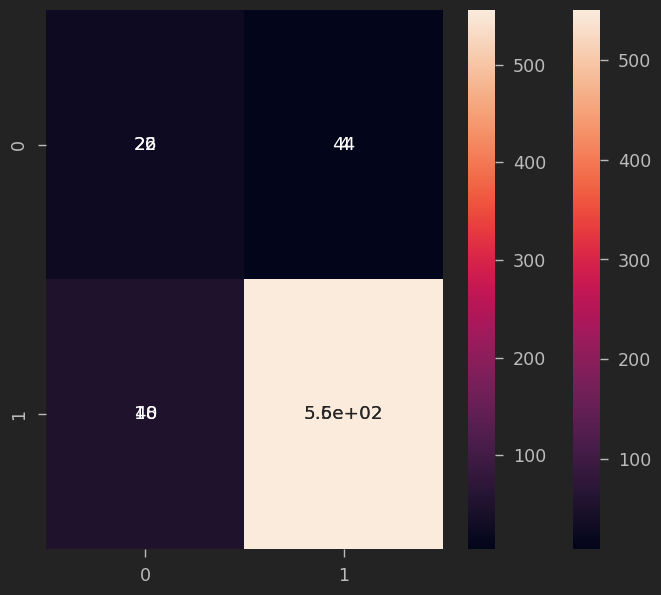

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)
from sklearn.metrics import classification_report, confusion_matrix
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_test))
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.11      0.19        70
           1       0.90      0.99      0.94       560

    accuracy                           0.89       630
   macro avg       0.76      0.55      0.57       630
weighted avg       0.87      0.89      0.86       630



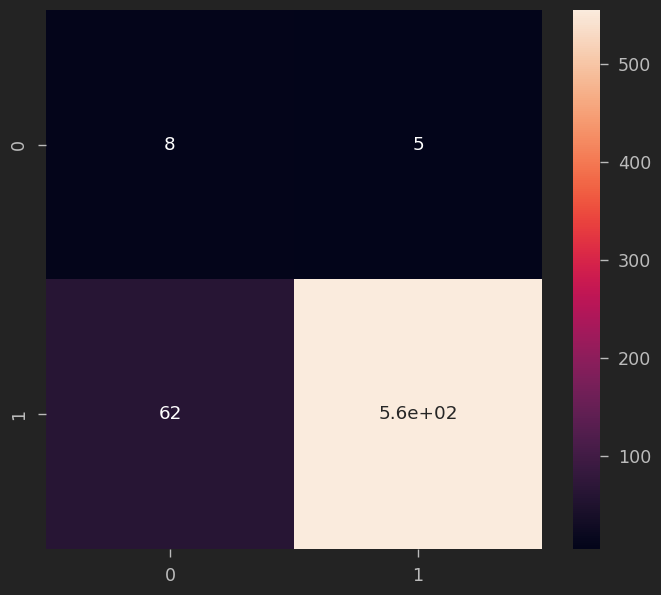

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))